## Creating a graph of a Home Assistant sensor
This notebook contains a simple example that creates a graph with data stored by Home Assistant in the local database. For the graph is [mpld3](http://mpld3.github.io/index.html) used which combines [matplotlib](http://www.matplotlib.org/) and [D3js](https://d3js.org/).

### Setup

In [1]:
# matplotlib for plotting the data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

import mpld3
mpld3.enable_notebook()

In [4]:
from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker

from homeassistant.components.recorder.models import Base, Events, States, RecorderRuns

### Setup the database connection

In [5]:
# Your database URL
DB_URL = "sqlite:////path/to/.homeassistant/home-assistant_v2.db"

In [6]:
# Database setup
engine = create_engine(DB_URL)
Base.metadata.create_all(engine)
session_factory = sessionmaker(bind=engine)
Session = scoped_session(session_factory)

### Query

In [7]:
data = list(engine.execute("SELECT state, last_changed FROM states WHERE entity_id = 'sensor.kitchen_temperature' AND state != 'unknown' AND state < 25"))

In [8]:
# Samples
data[0:4]

[('23', '2017-08-27 07:37:38.580612'),
 ('22', '2017-08-27 07:37:48.907412'),
 ('21', '2017-08-27 07:37:52.900214'),
 ('20', '2017-08-27 07:38:02.551013')]

### Prepare data for graph

In [9]:
values = []
timestamps = []

In [10]:
for x in data:
    timestamps.append(dates.date2num(datetime.datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f')))
    values.append(float(x[0]))

In [11]:
# Sample
timestamps[0], values[0]

(736568.317807646, 23.0)

### Plot the graph

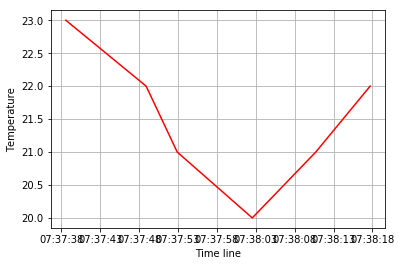

In [12]:
labels = timestamps
plt.plot_date(x=timestamps, y=values, fmt="r-")
plt.grid(b='on')
plt.ylabel('Temperature')
plt.xlabel('Time line')

There is almost no difference to the first graphing notebook. A few graphing libraries can be used that way which allows you to choose the library that fits best.